# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observable trends:
* In the southern hemisphere, we can see that the latitude decreases proportionally with the temperature. In the northern hemisphere is the opposite. While the latitude increases, the temperature is getting smaller or colder.

* It looks like all the other factors studied (humidity, cloudiness, and wind speed) are no correlate with the latitude.

* The regressions about the latitude vs. temperature are good. They properly explain the relationship between these two factors.  And we can see that in their r-square values (Northern r-square: 0.60678, Southern r-square: 0.6036)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
long=len(cities)
print(long)
 



603


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Loop through the list of cities and perform a request for data on each

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="

# Initializing list and counter 
founded_cities = []
lat = []
lng = [] 
max_temp=[]
humidity = []
cloudiness = [] 
wind_speed=[]
country = [] 
date = []
counter = 0 
number_set = int(round(long/50+0.5,0))
counter_set = 1

print('Beginning Data Retrieval \n')
print('-----------------------------------------')

for city in cities:
    if counter < 50:
        try:
            response = requests.get(query_url + city).json()
            founded_cities.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            print(f'Processing Record {counter} of Set {counter_set} | {city}')
            counter = counter + 1
        except:
            print("City not found. Skipping...")
            counter = counter + 1            
    else:
        counter = 0
        counter_set = counter_set + 1
        try:
            response = requests.get(query_url + city).json()
            founded_cities.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            print(f'Processing Record {counter} of Set {counter_set} | {city}')
            counter = counter + 1
        except:
            print("City not found. Skipping...")
            counter = counter + 1



Beginning Data Retrieval 

-----------------------------------------
Processing Record 0 of Set 1 | chokurdakh
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | filadelfia
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | flinders
Processing Record 5 of Set 1 | saint anthony
Processing Record 6 of Set 1 | gainesville
Processing Record 7 of Set 1 | yaring
Processing Record 8 of Set 1 | biloela
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | bethel
City not found. Skipping...
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | carauari
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bella vista
Processing Record 20 of Set 1 | kuusamo
Processing Record 21 of Set 1 | marsabit
Processing Record 22 of Set 1 | port-gentil
Processing Re

Processing Record 4 of Set 5 | tiarei
Processing Record 5 of Set 5 | vila franca do campo
Processing Record 6 of Set 5 | sorland
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | shushenskoye
Processing Record 9 of Set 5 | beringovskiy
Processing Record 10 of Set 5 | tomatlan
Processing Record 11 of Set 5 | sikasso
City not found. Skipping...
Processing Record 13 of Set 5 | moa
Processing Record 14 of Set 5 | klaksvik
Processing Record 15 of Set 5 | cabo san lucas
Processing Record 16 of Set 5 | vostok
Processing Record 17 of Set 5 | natal
City not found. Skipping...
Processing Record 19 of Set 5 | ryotsu
Processing Record 20 of Set 5 | morden
Processing Record 21 of Set 5 | gejiu
Processing Record 22 of Set 5 | okulovka
City not found. Skipping...
Processing Record 24 of Set 5 | sioux lookout
Processing Record 25 of Set 5 | boke
City not found. Skipping...
City not found. Skipping...
Processing Record 28 of Set 5 | scottsbluff
Processing Record 29 of Set 5 | 

Processing Record 10 of Set 9 | byron bay
City not found. Skipping...
Processing Record 12 of Set 9 | talara
Processing Record 13 of Set 9 | kodiak
Processing Record 14 of Set 9 | ponta do sol
Processing Record 15 of Set 9 | najran
Processing Record 16 of Set 9 | decatur
Processing Record 17 of Set 9 | dezful
Processing Record 18 of Set 9 | komsomolskiy
Processing Record 19 of Set 9 | kikwit
Processing Record 20 of Set 9 | dukat
Processing Record 21 of Set 9 | mackay
Processing Record 22 of Set 9 | vorkuta
Processing Record 23 of Set 9 | omboue
Processing Record 24 of Set 9 | west bay
City not found. Skipping...
Processing Record 26 of Set 9 | juneau
Processing Record 27 of Set 9 | kralendijk
Processing Record 28 of Set 9 | tecoanapa
Processing Record 29 of Set 9 | ilo
Processing Record 30 of Set 9 | zlynka
Processing Record 31 of Set 9 | banjarmasin
Processing Record 32 of Set 9 | egvekinot
Processing Record 33 of Set 9 | noumea
Processing Record 34 of Set 9 | ponta delgada
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_df = pd.DataFrame({'City':founded_cities,'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Humidity':humidity,'Cloudiness':cloudiness,
                     'Wind Speed':wind_speed,'Country':country,'Date':date})

data_df.to_csv('output_data/city_data.csv', index=False)

data_df.count()


City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
data_df['Max Temp (F)']=""

In [6]:
for index, row in data_df.iterrows():
    tempK = row['Max Temp']
    tempF=round((tempK-273.15)*9/5 + 32,2) 
    data_df.loc[index, "Max Temp (F)"] = tempF

In [7]:
data_df.dtypes

City             object
Lat             float64
Lng             float64
Max Temp        float64
Humidity          int64
Cloudiness        int64
Wind Speed      float64
Country          object
Date              int64
Max Temp (F)     object
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
high_humidity = data_df.loc[data_df['Humidity'] > 100]
len(high_humidity)

0

In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_index=[]

if len(high_humidity)>0:
    high_humidity_index = data_df.loc[data_df['Humidity'] > 100].index

print(len(high_humidity_index))  
high_humidity_index

    

0


[]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(high_humidity_index) > 0:
    for idx in high_humidity_index:
        data_df = data_df.drop(idx)
       

    
data_df.count()


City            554
Lat             554
Lng             554
Max Temp        554
Humidity        554
Cloudiness      554
Wind Speed      554
Country         554
Date            554
Max Temp (F)    554
dtype: int64

In [11]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
data_df.to_csv('output_data/city_data.csv',index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

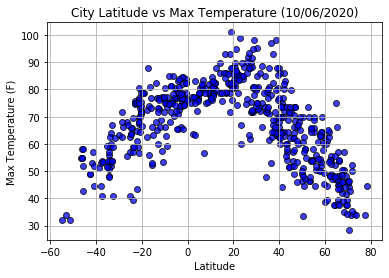

In [29]:
x_axis = data_df.iloc[:,1]
y = data_df.iloc[:,9]

now = datetime.date.today().strftime("%d/%m/%Y")  
plt.title(f"City Latitude vs Max Temperature ({now})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(x_axis,y,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.savefig('output_data/lat_vs_temp.png')
plt.show()


## Latitude vs. Humidity Plot

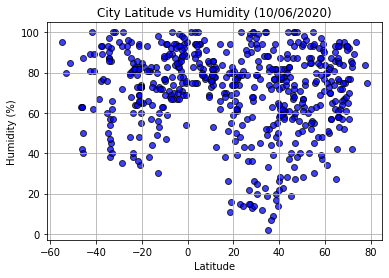

In [30]:
x_axis = data_df.iloc[:,1]
y = data_df.iloc[:,4]

now = datetime.date.today().strftime("%d/%m/%Y")  
plt.title(f"City Latitude vs Humidity ({now})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(x_axis,y,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.savefig('output_data/lat_vs_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

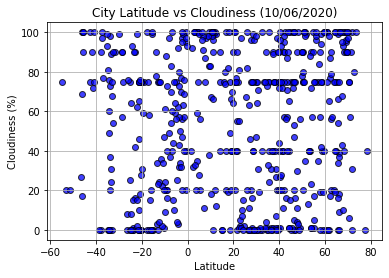

In [31]:
x_axis = data_df.iloc[:,1]
y = data_df.iloc[:,5]

now = datetime.date.today().strftime("%d/%m/%Y")  
plt.title(f"City Latitude vs Cloudiness ({now})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(x_axis,y,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.savefig('output_data/lat_vs_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

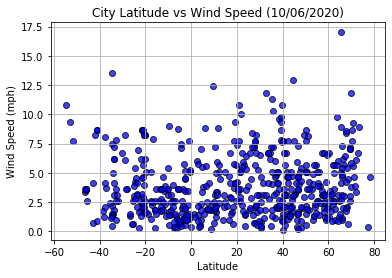

In [32]:
x_axis = data_df.iloc[:,1]
y = data_df.iloc[:,6]

now = datetime.date.today().strftime("%d/%m/%Y")  
plt.title(f"City Latitude vs Wind Speed ({now})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(x_axis,y,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.savefig('output_data/lat_vs_wind.png')
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def Call_Regression(x_values,y_values):
    rvalue = 0.0
    line_eq = ""
    
    try:
        
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(x_values,regress_values,"r-")
        
    except Exception as err:
        print(f'Other error occurred: {err}')
    return rvalue, line_eq          


In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = data_df.loc[data_df['Lat']>=0]

southern_df = data_df.loc[data_df['Lat']<0]

print(f'The lenght of the whole data frame is {len(data_df)} \nThe lenght of the northern data frame is {len(northern_df)} \nThe lenght of the southern data frame is {len(southern_df)} \nThe lenght of northern + southern is {len(southern_df)+len(northern_df)}')


The lenght of the whole data frame is 554 
The lenght of the northern data frame is 370 
The lenght of the southern data frame is 184 
The lenght of northern + southern is 554


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6067815896080089 


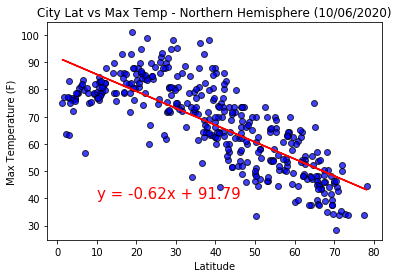

In [36]:
x_values = northern_df.iloc[:,1]
y_values = northern_df.iloc[:,9]


now = datetime.date.today().strftime("%d/%m/%Y")  
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.title(f"City Lat vs Max Temp - Northern Hemisphere ({now})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

rvalue,line_eq = Call_Regression(x_values,y_values.astype('float64'))

print(f'The r-squared is: {rvalue*rvalue} ')
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.savefig('output_data/regression_temp_north.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.60360055076886 


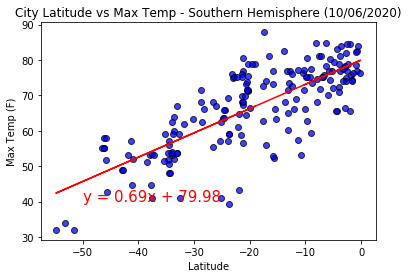

In [37]:
x_values = southern_df.iloc[:,1]
y_values = southern_df.iloc[:,9]


now = datetime.date.today().strftime("%d/%m/%Y")  
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.title(f"City Latitude vs Max Temp - Southern Hemisphere ({now})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

rvalue,line_eq = Call_Regression(x_values,y_values.astype('float64'))

print(f'The r-squared is: {rvalue*rvalue} ')
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.savefig('output_data/regression_temp_south.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003922448363716677 


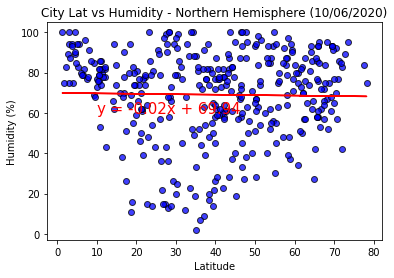

In [39]:
x_values = northern_df.iloc[:,1]
y_values = northern_df.iloc[:,4]


now = datetime.date.today().strftime("%d/%m/%Y")  
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.title(f"City Lat vs Humidity - Northern Hemisphere ({now})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

rvalue,line_eq = Call_Regression(x_values,y_values)

print(f'The r-squared is: {rvalue*rvalue} ')
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.savefig('output_data/regression_hum_north.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.023666390140221552 


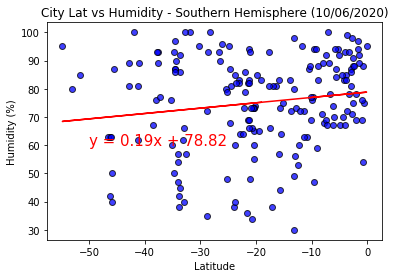

In [38]:
x_values = southern_df.iloc[:,1]
y_values = southern_df.iloc[:,4]


now = datetime.date.today().strftime("%d/%m/%Y")  
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.title(f"City Lat vs Humidity - Southern Hemisphere ({now})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

rvalue,line_eq = Call_Regression(x_values,y_values)

print(f'The r-squared is: {rvalue*rvalue} ')
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.savefig('output_data/regression_hum_south.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.2316771827788758e-05 


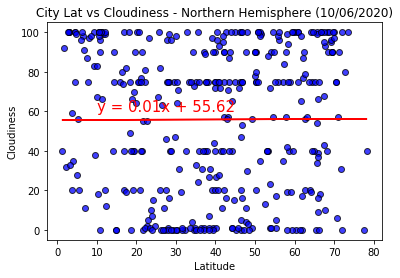

In [40]:
x_values = northern_df.iloc[:,1]
y_values = northern_df.iloc[:,5]


now = datetime.date.today().strftime("%d/%m/%Y")  
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.title(f"City Lat vs Cloudiness - Northern Hemisphere ({now})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

rvalue,line_eq = Call_Regression(x_values,y_values)

print(f'The r-squared is: {rvalue*rvalue} ')
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.savefig('output_data/regression_cloud_north.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002782326051333574 


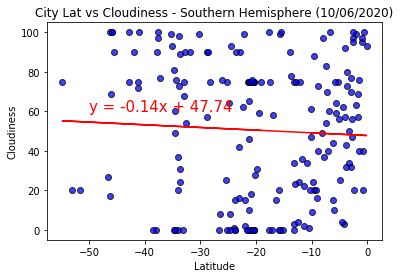

In [41]:
x_values = southern_df.iloc[:,1]
y_values = southern_df.iloc[:,5]


now = datetime.date.today().strftime("%d/%m/%Y")  
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.title(f"City Lat vs Cloudiness - Southern Hemisphere ({now})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

rvalue,line_eq = Call_Regression(x_values,y_values)

print(f'The r-squared is: {rvalue*rvalue} ')
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.savefig('output_data/regression_cloud_south.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007735894936239688 


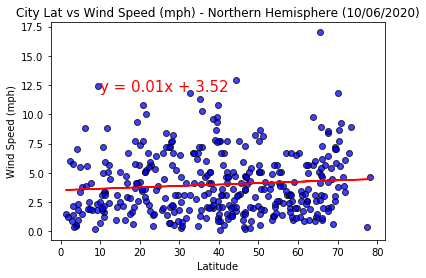

In [42]:
x_values = northern_df.iloc[:,1]
y_values = northern_df.iloc[:,6]


now = datetime.date.today().strftime("%d/%m/%Y")  
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.title(f"City Lat vs Wind Speed (mph) - Northern Hemisphere ({now})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

rvalue,line_eq = Call_Regression(x_values,y_values)

print(f'The r-squared is: {rvalue*rvalue} ')
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.savefig('output_data/regression_wind_north.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08342277928427937 


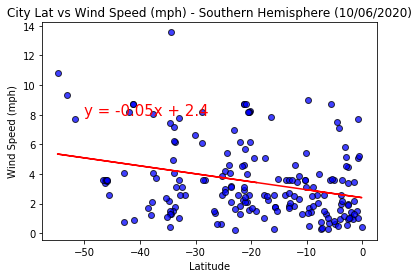

In [43]:
x_values = southern_df.iloc[:,1]
y_values = southern_df.iloc[:,6]


now = datetime.date.today().strftime("%d/%m/%Y")  
plt.scatter(x_values,y_values,marker="o",facecolors="blue",edgecolors="black", alpha = 0.75 )
plt.title(f"City Lat vs Wind Speed (mph) - Southern Hemisphere ({now})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

rvalue,line_eq = Call_Regression(x_values,y_values)

print(f'The r-squared is: {rvalue*rvalue} ')
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.savefig('output_data/regression_wind_south.png')
plt.show()